# **Herramientas de Análisis**

---
---

<!-- script html for image -->

<center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Sw-ep1-logo.svg/1280px-Sw-ep1-logo.svg.png"  width="500" height="150"/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_I_-_La_amenaza_fantasma)

</center>

<br>

# **Índice**

---
---

> [Herramientas de Análisis](#scrollTo=tW3jK_BDgjno&line=20&uniqifier=1)
<br>
>>
>> [Preparación del Entorno](#scrollTo=5zZfGqOugjnr&line=3&uniqifier=1) \\
>>   \\
>> [Ejercicio 2](#scrollTo=EljLebnxgjqM) \\

# Preparación del entorno

Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.

In [17]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

# Ejercicio 2

Para el ejercicio 2, añadimos los datos del ejercicio 1 los datos de planetas.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}

# Datos people
people_df = entidades_df['people'][["height","mass","birth_year","gender","homeworld"]].dropna()

# planetas
planets_df = entidades_df['planets'][["orbital_period","url"]].dropna()
planets_df.head()

,orbital_period,url
name,,
Tatooine,304.0,http://swapi.dev/api/planets/1/
Alderaan,364.0,http://swapi.dev/api/planets/2/
Yavin IV,4818.0,http://swapi.dev/api/planets/3/
Hoth,549.0,http://swapi.dev/api/planets/4/
Dagobah,341.0,http://swapi.dev/api/planets/5/


## Ejercicio 2.1.

Construye una función que diga "buenos días", "buenas tardes" o "buenas noches" en función de la hora del día.

> Truco 1: Para testear la función haz que tenga un parametro de entrada que tenga como valor por defecto: `datetime.now()` (primero carga `from datetime import datetime`).

> Truco 2: Puedes extraer la hora de un datetime con `.hour`.

In [19]:
# Solución:
from datetime import datetime

def saludo(hora=datetime.now()):
#El formato de hora es en 24 Hs.
    if hora.hour >= 4 and hora.hour < 12:
        print("Buenos días")
    elif hora.hour >= 12 and hora.hour < 20:
        print("Buenas tardes")
    else:
        print("Buenas noches")
        
saludo()

Buenos días


## Ejercicio 2.2.

En el data frame personajes_df, calcula de nuevo el IMC y crea una nueva variable con el trameado de la variable IMC definido en la siguiente tabla:

 | Categoría de nivel de peso | Intervalo del percentil |
 | -------------------------- | ----------------------- | 
 | Bajo peso | < 18.5 |
 | Normal | >= 18.5 y < 25 |
 | Sobrepeso | >= 25 y <30 |
 | Obeso | >= 30 |

> Truco: utiliza `pd.cut(..., right=False)` y modifica las etiquetas con `.cat.categories`.  

In [20]:
# Solución:

personajes_df = people_df.copy()
personajes_df.index.name = "nombre"
personajes_df.columns =["altura","peso","anio_nacimiento","genero","planeta de origen"]

personajes_df["IMC"] = personajes_df["peso"]/ (personajes_df["altura"]/100)**2

personajes_df["IMC_cat"] = pd.cut(personajes_df.IMC, [-np.infty,18.5,25,30,np.infty], right = False)

personajes_df["IMC_cat"].cat.categories = ["Bajo peso","Normal","Sobrepeso","Obeso"]

personajes_df.head(10)

,altura,peso,anio_nacimiento,genero,planeta de origen,IMC,IMC_cat
nombre,,,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582,Sobrepeso
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323,Sobrepeso
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/,34.722222,Obeso
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066,Obeso
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/,21.777778,Normal
Owen Lars,178.0,120.0,52.0,male,http://swapi.dev/api/planets/1/,37.874006,Obeso
Beru Whitesun lars,165.0,75.0,47.0,female,http://swapi.dev/api/planets/1/,27.548209,Sobrepeso
Biggs Darklighter,183.0,84.0,24.0,male,http://swapi.dev/api/planets/1/,25.082863,Sobrepeso
Obi-Wan Kenobi,182.0,77.0,57.0,male,http://swapi.dev/api/planets/20/,23.245985,Normal


## Ejercicio 2.3.

Muestra las frecuencias de la nueva variable definida en 2.2.

In [21]:
# Solución:

personajes_df["IMC_cat"].value_counts().sort_index()


Bajo peso     4
Normal       14
Sobrepeso    11
Obeso         7
Name: IMC_cat, dtype: int64

## Ejercicio 2.4.

Calcula ahora un trameado de la edad en 5 grupos equiprobables.

Muestra los recuentos (frecuencias) de la nueva obtenida por pantalla.

> Truco: Busca ayuda de la función [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

In [22]:
# Solución:

personajes_df["edad_cat"] = pd.qcut(personajes_df.anio_nacimiento,5, 
                                    labels = ["< 29",">= 29 y < 41.9",">= 41.9 y <52", ">= 52 y < 82", ">= 82"])

personajes_df.edad_cat.value_counts().sort_index()


< 29              8
>= 29 y < 41.9    8
>= 41.9 y <52     6
>= 52 y < 82      7
>= 82             7
Name: edad_cat, dtype: int64

## Ejercicio 2.5.

Presenta la tabla cruzada de tramos de edad (ej. 2.4) por tramos de IMC (ej. 2.2). 

¿Qué tramo de edad tiene un mayor número de personajes con Bajo peso?

In [23]:
# Solución:

pd.crosstab(personajes_df.IMC_cat,personajes_df.edad_cat)

edad_cat,< 29,>= 29 y < 41.9,>= 41.9 y <52,>= 52 y < 82,>= 82
IMC_cat,,,,,
Bajo peso,0,1,3,0,0
Normal,3,2,1,4,4
Sobrepeso,4,3,1,2,1
Obeso,1,2,1,1,2


#### Respuesta:
El tramo de edad con mayor n° de personajes con Bajo Peso es el que va entre 41.9 años y 52.



## Ejercicio 2.6.

Calcula una tabla resumen (data frame) donde se presente la media del IMC en cada tramo de edad calculado en ejercicio 2.4.

Presenta por pantalla la nueva tabla resumen.


In [24]:
# Solución:

IMC_edad_df = personajes_df.groupby(["edad_cat"]).agg(IMC_mean=("IMC","mean"),
                                                      anio_nacimiento_median=("anio_nacimiento","median"))
        
IMC_edad_df


,IMC_mean,anio_nacimiento_median
edad_cat,,
< 29,25.960538,20.0
>= 29 y < 41.9,26.242997,38.5
>= 41.9 y <52,22.972490,47.5
>= 52 y < 82,24.774935,58.0
>= 82,85.311313,112.0


## Ejercicio 2.7.

Presenta los datos del ej. 2.6. como un gráfico de líneas donde el eje x sea la edad y el eje y el IMC medio.

> Truco: Como eje x del gráfico de líneas, puedes calcular en 2.6., en el mismo cálculo del IMC medio, la mediana de edad de cada tramo de edad.

Text(0, 0.5, 'Promedio de IMC')

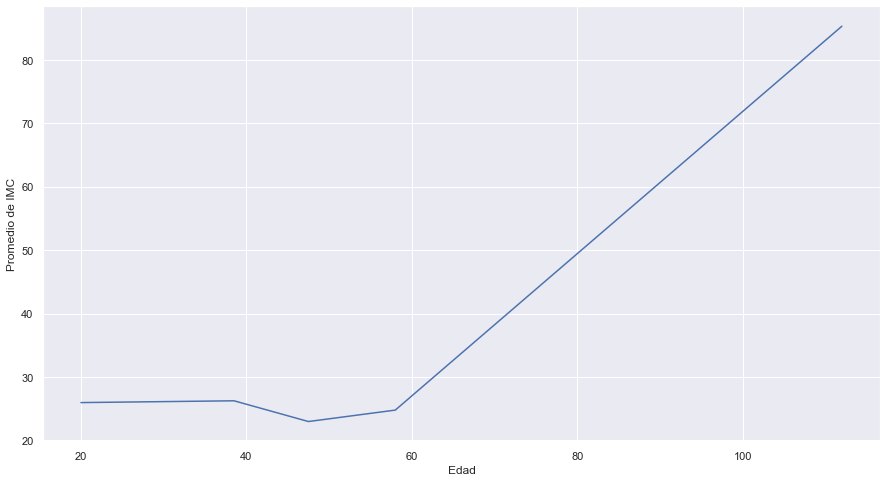

In [25]:
# Solución:
sns.set(rc = {'figure.figsize':(15,8)})

sns.lineplot(x = IMC_edad_df.anio_nacimiento_median,
             y = IMC_edad_df.IMC_mean)

plt.xlabel("Edad")
plt.ylabel("Promedio de IMC")


## Ejercicio 2.8.

Calcula el ratio del IMC sobre la mediana del IMC de su tramo de edad (definidos en el ejercicio 2.2.) mediante la función groupby(...).apply(...).

> truco: primero crea una función que devuelva:  `x / np.nanmedian(x)`.

Presenta los datos mediante un boxplot de la nueva variable: [pd.boxplot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html). 

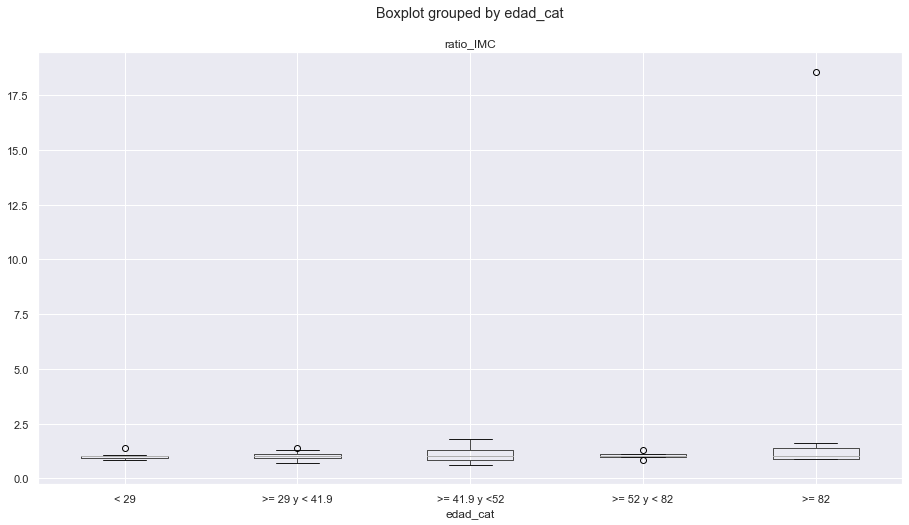

In [26]:
# Solución:

def ratio(x):
     x["ratio_IMC"]= x["IMC"]/np.nanmedian(x["IMC"])
     return x

personajes_df = personajes_df.groupby("edad_cat").apply(ratio)

personajes_df.boxplot(column= "ratio_IMC", by= "edad_cat")

## Ejercicio 2.9.

¿Cual es planeta con un menor índice IMC medio de sus personajes?
¿Que personaje/s son de ese planeta?

In [27]:
# Solución:

#Reset index para obtener el nombre de los planetas y para que, al hacer el merge, no perder la columna "nombre" de personajes
planets_df = planets_df.reset_index()
personajes_df =personajes_df.reset_index()

#Merge de planetas y personajes
personajes_df = pd.merge(personajes_df, planets_df[["url","name"]], 
                                           how="right",
                                           left_on = ["planeta de origen"], 
                                           right_on =["url"]).set_index("nombre")

#Drop de la columna clave de planets_df
personajes_df.drop("url", axis= 1, inplace= True)
#Renombrar columna para clarificar su información
personajes_df.rename(columns={"name": "nombre_planeta"}, inplace= True)
#Cálculo de media de IMC agrupado por planetas, DF temporal para este cálculo
planetas_agrupados_df = personajes_df.groupby("planeta de origen")[["IMC"]].mean()
#Filtro por planeta con minimo IMC promedio
personajes_df[personajes_df["planeta de origen"] == planetas_agrupados_df.IMC.idxmin()]


,altura,peso,anio_nacimiento,genero,planeta de origen,IMC,IMC_cat,edad_cat,ratio_IMC,nombre_planeta
nombre,,,,,,,,,,
Ayla Secura,178.0,55.0,48.0,female,http://swapi.dev/api/planets/37/,17.358919,Bajo peso,>= 41.9 y <52,0.824963,Ryloth


#### Respuesta

El planeta con menor IMC promedio es Ryloth, el cual es solo poblado por un solo personaje (Ayla Secura).

## Ejercicio 2.10.

Convierte a datetime los siguientes strings con la función [datetime.strptime()](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) (consulta la ayuda si es necesario) de la libreria datetime:

- "1 january, 2020"
- "15-feb.-2017"
- "20190701 22:30"  # 1 de julio de 2019



In [28]:
# Solución:

#import locale
#locale.setlocale(locale.LC_TIME, 'en_EN.UTF-8')

primer_fecha = datetime.strptime("1 january, 2020".replace(",",""),"%d %B %Y")
print("Primera Fecha")
print(type(primer_fecha))
print(primer_fecha)
print("-"*40)

segunda_fecha = datetime.strptime("15-feb.-2017".replace("-"," ")
                                                .replace(".",""),
                                  "%d %b %Y")
print("Segunda Fecha")
print(type(segunda_fecha))
print(segunda_fecha)
print("-"*40)

tercera_fecha = datetime.strptime("20190701 22:30", "%Y%m%d %H:%M")

print("Tercer Fecha")
print(type(tercera_fecha))
print(tercera_fecha)
print("-"*40)


Primera Fecha
<class 'datetime.datetime'>
2020-01-01 00:00:00
----------------------------------------
Segunda Fecha
<class 'datetime.datetime'>
2017-02-15 00:00:00
----------------------------------------
Tercer Fecha
<class 'datetime.datetime'>
2019-07-01 22:30:00
----------------------------------------
